## Análise de Expectativa de Vida e PIB.

#### Autor: Fábio Lúcio Félix
#### Linkedin: https://www.linkedin.com/in/fábio-félix-952a78231/

### Importando as bibliotecas Pandas para análise do DataFrame e a biblioteca MatPlotLib para visualização gráficas dos dados

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [394]:
df = pd.read_csv("gapminder_full.csv")
pd.options.display.float_format = '{:20,.2f}'.format

In [395]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


### Traduzindo as colunas de inglês para português

In [396]:
df = df.rename(columns={"country":"pais","year":"ano","population":"populacao","continent":"continente","life_exp":"expectativa de vida","gdp_cap":"PIB"})

In [397]:
df.head()

,pais,ano,populacao,continente,expectativa de vida,PIB
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


### Verificando se existe algum dado faltando no DataFrame

In [398]:
df.isnull().sum()

pais                   0
ano                    0
populacao              0
continente             0
expectativa de vida    0
PIB                    0
dtype: int64

### Identificando as colunas do DataFrame

In [399]:
df.columns

Index(['pais', 'ano', 'populacao', 'continente', 'expectativa de vida', 'PIB'], dtype='object')

### Identificando os continentes contidos no DataFrame

In [400]:
df["continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

### Dividindo o DataFrame por continente

In [401]:
df_Asia = df.loc[df["continente"] == "Asia"]
df_Europa = df.loc[df["continente"] == "Europe"]
df_Africa = df.loc[df["continente"] == "Africa"]
df_Americas = df.loc[df["continente"] == "Americas"]
df_Oceania = df.loc[df["continente"] == "Oceania"]

### Contando quantos paises existem em cada continente

In [402]:
df.groupby("continente")["pais"].nunique()

continente
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: pais, dtype: int64

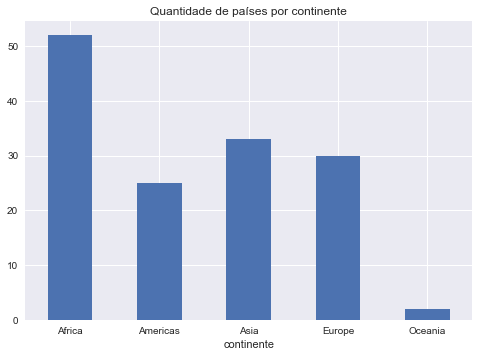

In [403]:
df.groupby("continente")["pais"].nunique().plot.bar(title="Quantidade de países por continente")
plt.xticks(rotation='horizontal');

## ----------------------------------- 1. Análise para o continente da Asia ------------------------------------------

In [404]:
df_Asia["pais"].unique()

array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
       'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
       'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

### 1.1 Aqui foi realizada a média da expectativa de vida dentre os Países da Asia, nos anos que estão presentes no DataFrame

In [405]:
top5_EXP_Asia = df_Asia.groupby("pais")["expectativa de vida"].mean().sort_values(ascending=False)
print(top5_EXP_Asia)

pais
Japan                               74.83
Israel                              73.65
Hong Kong, China                    73.49
Singapore                           71.22
Taiwan                              70.34
Kuwait                              68.92
Sri Lanka                           66.53
Lebanon                             65.87
Bahrain                             65.61
Korea, Rep.                         65.00
Malaysia                            64.28
Korea, Dem. Rep.                    63.61
Thailand                            62.20
China                               61.79
Syria                               61.35
Philippines                         60.97
West Bank and Gaza                  60.33
Jordan                              59.79
Saudi Arabia                        58.68
Iran                                58.64
Oman                                58.44
Vietnam                             57.48
Iraq                                56.58
Mongolia                     

In [406]:
top5_EXP_Asia = top5_EXP_Asia[:5]
top5_EXP_Asia = ["Japan", "Israel", "Hong Kong, China", "Singapore", "Taiwan"]

### 1.2 Gráfico mostrando a evolução da expectativa de vida ao longo dos anos presentes no DataFrame, para os 5 países com maior média de expectativa de vida 

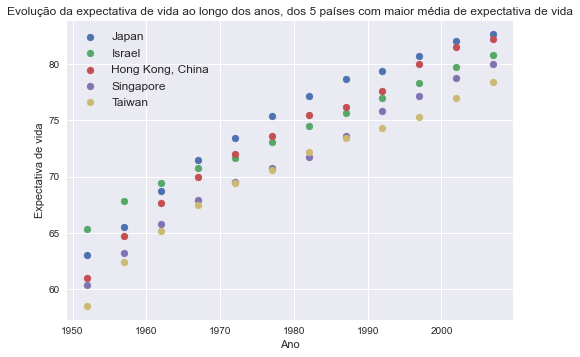

In [431]:
for pais in top5_EXP_Asia:
    plt.scatter(x=df_Asia.loc[df_Asia["pais"] == pais]["ano"], y = df_Asia.loc[df_Asia["pais"] == pais]["expectativa de vida"])
    plt.xlabel("Ano")
    plt.ylabel("Expectativa de vida")
    plt.title("Evolução da expectativa de vida ao longo dos anos, dos 5 países com maior média de expectativa de vida")
    plt.legend(top5_EXP_Asia,loc="best",fontsize=12)

In [288]:
top5_PIB_Asia = df_Asia.groupby("pais")["PIB"].mean().sort_values(ascending=False)
print(top5_PIB_Asia)

pais
Kuwait                          65,332.91
Saudi Arabia                    20,261.74
Bahrain                         18,077.66
Japan                           17,750.87
Singapore                       17,425.38
Hong Kong, China                16,228.70
Israel                          14,160.94
Oman                            12,138.56
Taiwan                          10,224.81
Korea, Rep.                      8,217.32
Iraq                             7,811.81
Iran                             7,376.58
Lebanon                          7,269.22
Malaysia                         5,406.04
West Bank and Gaza               3,760.00
Jordan                           3,128.12
Thailand                         3,045.97
Syria                            3,009.29
Korea, Dem. Rep.                 2,591.85
Philippines                      2,174.77
Sri Lanka                        1,854.73
Indonesia                        1,741.37
Mongolia                         1,692.80
Yemen, Rep.                  

In [408]:
top5_PIB_Asia = top5_PIB_Asia[:5]
top5_PIB_Asia = ["Kuwait","Saudi Arabia","Bahrain","Japan","Singapore"]

### 1.3 Gráfico mostrando a evolução do PIB ao longo dos anos presentes no DataFrame, para os 5 países com maior média do PIB 

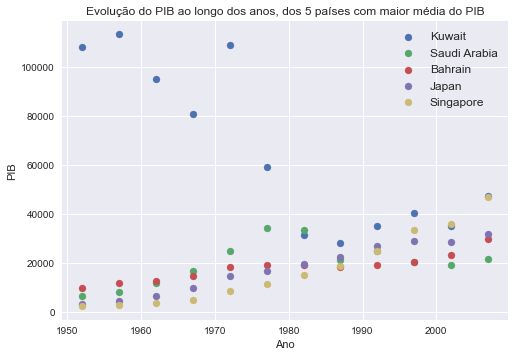

In [432]:
for pais in top5_PIB_Asia:
    plt.scatter(x=df_Asia.loc[df_Asia["pais"] == pais]["ano"], y = df_Asia.loc[df_Asia["pais"] == pais]["PIB"])
    plt.xlabel("Ano")
    plt.ylabel("PIB")
    plt.title("Evolução do PIB ao longo dos anos, dos 5 países com maior média do PIB")
    plt.legend(top5_PIB_Asia,loc="best",fontsize=12)

### 1.4 Conclusões:
#### O Japão e a Singapura foram os únicos países que apareceram no 5 primeiros colocados da média, tanto da expectativa de vida, quanto do PIB. 
#### O Kuwait apresentava um PIB elevadíssimo quando comparado com os outros 4 países melhores colocados na média do PIB ao longo dos anos, entretanto nas décadas de 70 e 80 apresentou uma quada considerável no PIB.

## ----------------------------------- 2. Análise para o continente da Africa ----------------------------------------

In [410]:
df_Africa["pais"].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Reunion', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

### 2.1 Aqui foi realizada a média da expectativa de vida dentre os Países da Africa, nos anos que estão presentes no DataFrame

In [411]:
top5_EXP_Africa = df_Africa.groupby("pais")["expectativa de vida"].mean().sort_values(ascending=False)
print(top5_EXP_Africa)

pais
Reunion                                   66.64
Mauritius                                 64.95
Tunisia                                   60.72
Libya                                     59.30
Algeria                                   59.03
Sao Tome and Principe                     57.90
Morocco                                   57.61
Egypt                                     56.24
Botswana                                  54.60
South Africa                              53.99
Namibia                                   53.49
Kenya                                     52.68
Zimbabwe                                  52.66
Congo, Rep.                               52.50
Comoros                                   52.38
Ghana                                     52.34
Mauritania                                52.30
Togo                                      51.50
Gabon                                     51.22
Senegal                                   50.63
Lesotho                            

In [412]:
top5_EXP_Africa = top5_EXP_Africa[:5]
top5_EXP_Africa = ["Reunion","Mauritius","Tunisia","Libya","Algeria"]

### 2.2 Gráfico mostrando a evolução da expectativa de vida ao longo dos anos presentes no DataFrame, para os 5 países com maior média de expectativa de vida 

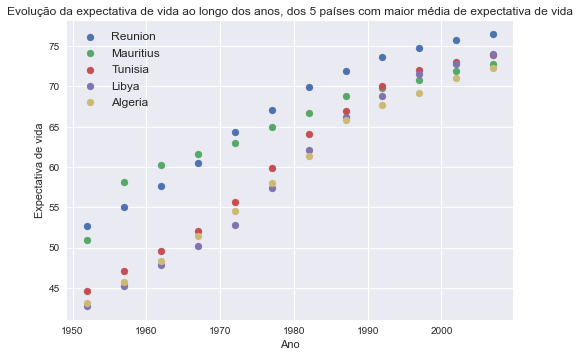

In [433]:
for pais in top5_EXP_Africa:
    plt.scatter(x=df_Africa.loc[df_Africa["pais"] == pais]["ano"], y = df_Africa.loc[df_Africa["pais"] == pais]["expectativa de vida"])
    plt.xlabel("Ano")
    plt.ylabel("Expectativa de vida")
    plt.title("Evolução da expectativa de vida ao longo dos anos, dos 5 países com maior média de expectativa de vida")
    plt.legend(top5_EXP_Africa,loc="best",fontsize=12)

In [415]:
top5_PIB_Africa = df_Africa.groupby("pais")["PIB"].mean().sort_values(ascending=False)
print(top5_PIB_Africa)

pais
Libya                                 12,013.58
Gabon                                 11,529.87
South Africa                           7,247.43
Botswana                               5,031.50
Reunion                                4,898.40
Mauritius                              4,768.94
Algeria                                4,426.03
Namibia                                3,675.58
Angola                                 3,607.10
Tunisia                                3,477.21
Congo, Rep.                            3,312.79
Swaziland                              3,163.35
Egypt                                  3,074.03
Djibouti                               2,697.83
Equatorial Guinea                      2,469.17
Morocco                                2,447.91
Cote d'Ivoire                          1,912.83
Sudan                                  1,835.01
Cameroon                               1,774.63
Senegal                                1,533.12
Nigeria                            

In [416]:
top5_PIB_Africa = top5_PIB_Africa[:5]
top5_PIB_Africa = ["Libya","Gabon","South Africa","Botswana","Reunion"]

### 2.3 Gráfico mostrando a evolução do PIB ao longo dos anos presentes no DataFrame, para os 5 países com maior média do PIB 

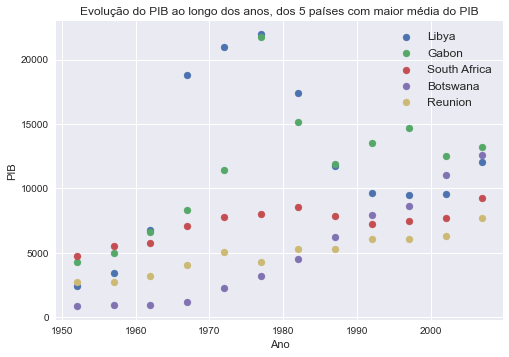

In [434]:
for pais in top5_PIB_Africa:
    plt.scatter(x=df_Africa.loc[df_Africa["pais"] == pais]["ano"], y = df_Africa.loc[df_Africa["pais"] == pais]["PIB"])
    plt.xlabel("Ano")
    plt.ylabel("PIB")
    plt.title("Evolução do PIB ao longo dos anos, dos 5 países com maior média do PIB")
    plt.legend(top5_PIB_Africa,loc="best",fontsize=12)

### 2.4 Conclusões:
#### Os países Reunion e Libya foram os únicos países que apareceram no 5 primeiros colocados da média, tanto da expectativa de vida, quanto do PIB. 
#### Os países Libya e Gabon apresentaram os maiores números para o PIB nas décadas de 70 e 80. Após uma queda desses números nos anos seguintes, Gabon se manteve como o país com o maior PIB do continente Africano.

## --------------------------------- 3. Análise para os continentes das Américas --------------------------------------

In [419]:
df_Americas["pais"].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
       'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela'],
      dtype=object)

### 3.1 Aqui foi realizada a média da expectativa de vida dentre os Países das Américas, nos anos que estão presentes no DataFrame

In [420]:
top5_EXP_Americas = df_Americas.groupby("pais")["expectativa de vida"].mean().sort_values(ascending=False)
print(top5_EXP_Americas)

pais
Canada                               74.90
United States                        73.48
Puerto Rico                          72.74
Cuba                                 71.05
Uruguay                              70.78
Costa Rica                           70.18
Argentina                            69.06
Jamaica                              68.75
Panama                               67.80
Chile                                67.43
Trinidad and Tobago                  66.83
Paraguay                             66.81
Venezuela                            66.58
Mexico                               65.41
Colombia                             63.90
Ecuador                              62.82
Brazil                               62.24
Dominican Republic                   61.55
El Salvador                          59.63
Peru                                 58.86
Nicaragua                            58.35
Honduras                             57.92
Guatemala                            56.73
Bolivi

In [421]:
top5_EXP_Americas = top5_EXP_Americas[:5]
top5_EXP_Americas = ["Canada","United States","Puerto Rico","Cuba","Uruguay"]

### 3.2 Gráfico mostrando a evolução da expectativa de vida ao longo dos anos presentes no DataFrame, para os 5 países com maior média de expectativa de vida 

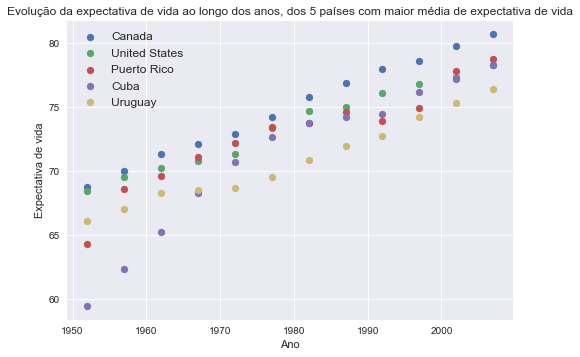

In [435]:
for pais in top5_EXP_Americas:
    plt.scatter(x=df_Americas.loc[df_Americas["pais"] == pais]["ano"], y = df_Americas.loc[df_Americas["pais"] == pais]["expectativa de vida"])
    plt.xlabel("Ano")
    plt.ylabel("Expectativa de vida")
    plt.title("Evolução da expectativa de vida ao longo dos anos, dos 5 países com maior média de expectativa de vida")
    plt.legend(top5_EXP_Americas,loc="best",fontsize=12)

In [423]:
top5_PIB_Americas = df_Americas.groupby("pais")["PIB"].mean().sort_values(ascending=False)
print(top5_PIB_Americas)

pais
United States                    26,261.15
Canada                           22,410.75
Puerto Rico                      10,863.16
Venezuela                        10,088.52
Argentina                         8,955.55
Trinidad and Tobago               7,866.87
Mexico                            7,724.11
Uruguay                           7,100.13
Chile                             6,703.29
Cuba                              6,283.26
Jamaica                           6,197.65
Brazil                            5,829.32
Panama                            5,754.83
Ecuador                           5,733.62
Peru                              5,613.84
Costa Rica                        5,448.61
El Salvador                       4,431.85
Colombia                          4,195.34
Guatemala                         4,015.40
Nicaragua                         3,424.66
Paraguay                          3,239.61
Bolivia                           2,961.23
Dominican Republic                2,844.86
Hondur

In [425]:
top5_PIB_Americas = top5_PIB_Americas[:5]
top5_PIB_Americas = ["United States","Canada","Puerto Rico","Venezuela","Argentina"]

### 3.3 Gráfico mostrando a evolução do PIB ao longo dos anos presentes no DataFrame, para os 5 países com maior média do PIB 

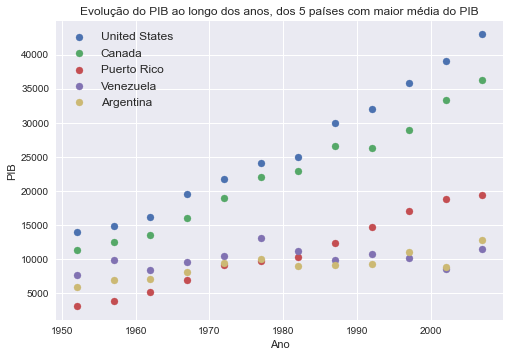

In [436]:
for pais in top5_PIB_Americas:
    plt.scatter(x=df_Americas.loc[df_Americas["pais"] == pais]["ano"], y = df_Americas.loc[df_Americas["pais"] == pais]["PIB"])
    plt.xlabel("Ano")
    plt.ylabel("PIB")
    plt.title("Evolução do PIB ao longo dos anos, dos 5 países com maior média do PIB")
    plt.legend(top5_PIB_Americas,loc="best",fontsize=12)

### 3.4 Conclusões:
#### Os Estados Unidos, Canadá e Porto Rico são os países que aparecem no ranking 5 da média tanto da expectativa de vida, quanto do PIB. 
#### É notavel que os dois países norte americanos se destacam tanto no crescimento da expectativa de vida, quanto do PIB ao longo dos anos.
#### No último gráfico, os Estados Unidos e o Canadá possuem um crescimento do PIB, consideravelmente maior, quando comparado com o restante dos países ilustrados. 

## --------------------------------- 4. Análise para o continente da Europa --------------------------------------

In [427]:
df_Europa["pais"].unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom'],
      dtype=object)

### 4.1 Aqui foi realizada a média da expectativa de vida dentre os Países da Europa, nos anos que estão presentes no DataFrame

In [428]:
top5_EXP_Europa = df_Europa.groupby("pais")["expectativa de vida"].mean().sort_values(ascending=False)
print(top5_EXP_Europa)

pais
Iceland                                 76.51
Sweden                                  76.18
Norway                                  75.84
Netherlands                             75.65
Switzerland                             75.57
Denmark                                 74.37
France                                  74.35
Spain                                   74.20
Italy                                   74.01
United Kingdom                          73.92
Greece                                  73.73
Belgium                                 73.64
Germany                                 73.44
Austria                                 73.10
Ireland                                 73.02
Finland                                 72.99
Slovenia                                71.60
Czech Republic                          71.51
Slovak Republic                         70.70
Portugal                                70.42
Montenegro                              70.30
Poland                       

In [429]:
top5_EXP_Europa = top5_EXP_Europa[:5]
top5_EXP_Europa = ["Iceland","Sweden","Norway","Netherlands","Switzerland"]

### 4.2 Gráfico mostrando a evolução da expectativa de vida ao longo dos anos presentes no DataFrame, para os 5 países com maior média de expectativa de vida

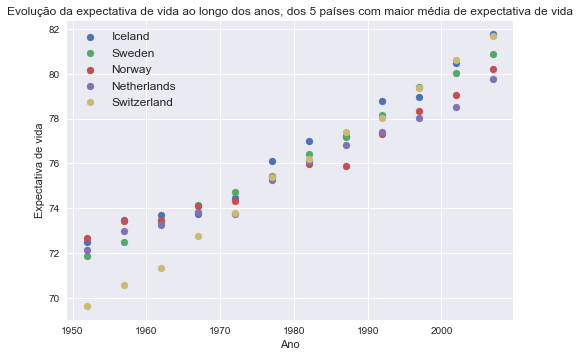

In [437]:
for pais in top5_EXP_Europa:
    plt.scatter(x=df_Europa.loc[df_Europa["pais"] == pais]["ano"], y = df_Europa.loc[df_Europa["pais"] == pais]["expectativa de vida"])
    plt.xlabel("Ano")
    plt.ylabel("Expectativa de vida")
    plt.title("Evolução da expectativa de vida ao longo dos anos, dos 5 países com maior média de expectativa de vida")
    plt.legend(top5_EXP_Europa,loc="best",fontsize=12)

In [309]:
top5_PIB_Europa = df_Europa.groupby("pais")["PIB"].mean().sort_values(ascending=False)
print(top5_PIB_Europa)

pais
Switzerland                         27,074.33
Norway                              26,747.31
Netherlands                         21,748.85
Denmark                             21,671.82
Germany                             20,556.68
Iceland                             20,531.42
Austria                             20,411.92
Sweden                              19,943.13
Belgium                             19,900.76
United Kingdom                      19,380.47
France                              18,833.57
Finland                             17,473.72
Italy                               16,245.21
Ireland                             15,758.61
Slovenia                            14,074.58
Spain                               14,029.83
Greece                              13,969.04
Czech Republic                      13,920.01
Portugal                            11,354.09
Hungary                             10,888.18
Slovak Republic                     10,415.53
Croatia                      

In [310]:
top5_PIB_Europa = top5_PIB_Europa[:5]
top5_PIB_Europa = ["Switzerland","Norway","Netherlands","Denmark","Germany"]

### 4.3 Gráfico mostrando a evolução do PIB ao longo dos anos presentes no DataFrame, para os 5 países com maior média do PIB

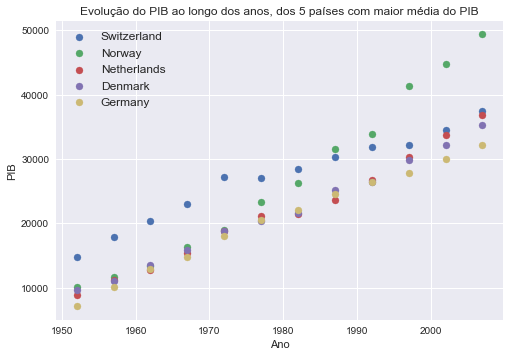

In [438]:
for pais in top5_PIB_Europa:
    plt.scatter(x=df_Europa.loc[df_Europa["pais"] == pais]["ano"], y = df_Europa.loc[df_Europa["pais"] == pais]["PIB"])
    plt.xlabel("Ano")
    plt.ylabel("PIB")
    plt.title("Evolução do PIB ao longo dos anos, dos 5 países com maior média do PIB")
    plt.legend(top5_PIB_Europa,loc="best",fontsize=12)

### 4.4 Conclusões:
#### Os países da Noruega, Holanda e Suíça, são os países que aparecem tanto no ranking da média sobre a expectativa de vida, quanto do PIB. 
#### A expectativa de vida ao longo dos anos, atinge a marca de 82 anos no último ano (2007). Comparado com as análises feitas anteriormente, essa é maior expectativa de vida já observada até o momento.
#### A Noruega vem aumentando o seu PIB nas duas últimas décadas, se distanciando consideravelmente dos outros países.

## --------------------------------- 5. Análise para o continente da Oceania --------------------------------------

In [312]:
df_Oceania["pais"].unique()

array(['Australia', 'New Zealand'], dtype=object)

### 5.1 Aqui foi realizada a média da expectativa de vida dentre os Países da Oceania, nos anos que estão presentes no DataFrame

In [313]:
top5_EXP_Oceania = df_Oceania.groupby("pais")["expectativa de vida"].mean().sort_values(ascending=False)
print(top5_EXP_Oceania)

pais
Australia                    74.66
New Zealand                  73.99
Name: expectativa de vida, dtype: float64


In [314]:
top5_EXP_Oceania = ["Australia","New Zealand"]

### 5.2 Gráfico mostrando a evolução da expectativa de vida ao longo dos anos presentes no DataFrame, para os 5 países com maior média de expectativa de vida

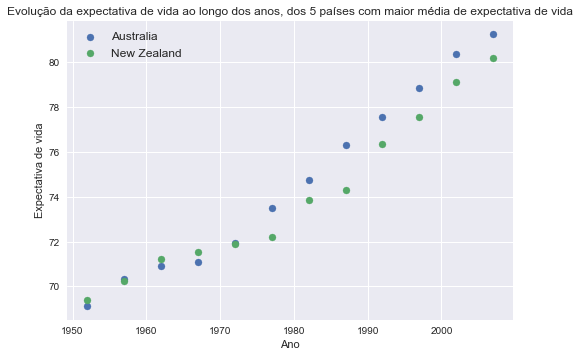

In [439]:
for pais in top5_EXP_Oceania:
    plt.scatter(x=df_Oceania.loc[df_Oceania["pais"] == pais]["ano"], y = df_Oceania.loc[df_Oceania["pais"] == pais]["expectativa de vida"])
    plt.xlabel("Ano")
    plt.ylabel("Expectativa de vida")
    plt.title("Evolução da expectativa de vida ao longo dos anos, dos 5 países com maior média de expectativa de vida")
    plt.legend(top5_EXP_Oceania,loc="best",fontsize=12)

In [316]:
top5_PIB_Oceania = df_Oceania.groupby("pais")["PIB"].mean().sort_values(ascending=False)
print(top5_PIB_Oceania)

pais
Australia                19,980.60
New Zealand              17,262.62
Name: PIB, dtype: float64


In [317]:
top5_PIB_Oceania = ["Australia","New Zealand"]

### 5.3 Gráfico mostrando a evolução do PIB ao longo dos anos presentes no DataFrame, para os 5 países com maior média do PIB

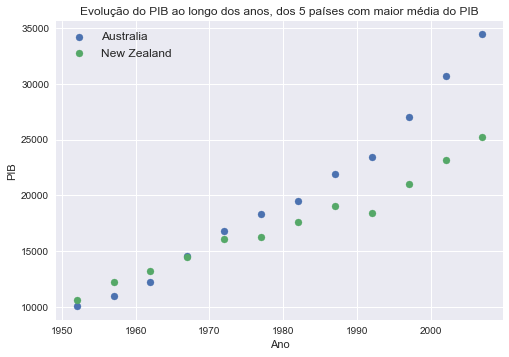

In [440]:
for pais in top5_PIB_Oceania:
    plt.scatter(x=df_Oceania.loc[df_Oceania["pais"] == pais]["ano"], y = df_Oceania.loc[df_Oceania["pais"] == pais]["PIB"])
    plt.xlabel("Ano")
    plt.ylabel("PIB")
    plt.title("Evolução do PIB ao longo dos anos, dos 5 países com maior média do PIB")
    plt.legend(top5_PIB_Oceania,loc="best",fontsize=12)

### 5.4 Conclusões:
#### Os únicos dois países da Oceania (Austrália e Nova Zelandia), apresentam um elevado crescimento na expectativa de vida ao longo dos anos. 
#### Na década de 50 a Nova Zelandia possuia um PIB maior comparado ao da Austrália, entretanto, esse cenário começou a mudar a partir da década de 70, onde a Austrália apresentou um maior crescimento do PIB nos anos posteriores.

## ----------------------------------------------- 6. Análise Global ------------------------------------------------------

### 6.1 Análise da média da expectativa de vida para cada continente ao longo dos anos que constam no DataFrame

In [390]:
anos = df["ano"].unique()

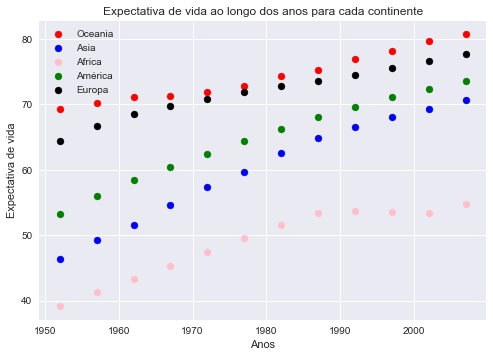

In [391]:
for i in anos:
    medias_anuais = df.loc[df["ano"] == i].groupby("continente")["expectativa de vida"].mean().sort_values(ascending=False)
    Oc = plt.scatter(x = i, y = medias_anuais["Oceania"],c="Red")
    As = plt.scatter(x = i, y = medias_anuais["Asia"], c="Blue")
    Af = plt.scatter(x = i, y = medias_anuais["Africa"],c="Pink")
    Am = plt.scatter(x = i, y = medias_anuais["Americas"], c="Green")
    Eu = plt.scatter(x = i, y = medias_anuais["Europe"], c="Black")
    plt.xlabel("Anos")
    plt.ylabel("Expectativa de vida")
    plt.title("Média da expectativa de vida ao longo dos anos para cada continente")
    plt.legend((Oc,As,Af,Am,Eu),("Oceania","Asia","Africa","América","Europa"),loc="best")

### 6.2 Análise da média do PIB para cada continente ao longo dos anos que constam no DataFrame

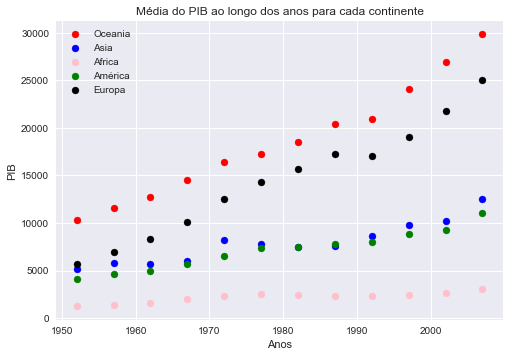

In [392]:
for i in anos:
    medias_anuais = df.loc[df["ano"] == i].groupby("continente")["PIB"].mean().sort_values(ascending=False)
    Oc = plt.scatter(x = i, y = medias_anuais["Oceania"],c="Red")
    As = plt.scatter(x = i, y = medias_anuais["Asia"], c="Blue")
    Af = plt.scatter(x = i, y = medias_anuais["Africa"],c="Pink")
    Am = plt.scatter(x = i, y = medias_anuais["Americas"], c="Green")
    Eu = plt.scatter(x = i, y = medias_anuais["Europe"], c="Black")
    plt.xlabel("Anos")
    plt.ylabel("PIB")
    plt.title("Média do PIB ao longo dos anos para cada continente")
    plt.legend((Oc,As,Af,Am,Eu),("Oceania","Asia","Africa","América","Europa"),loc="best")

### 6.3 A média da expectativa de vida, durante todos os anos presentes no DataFrame para cada continente.

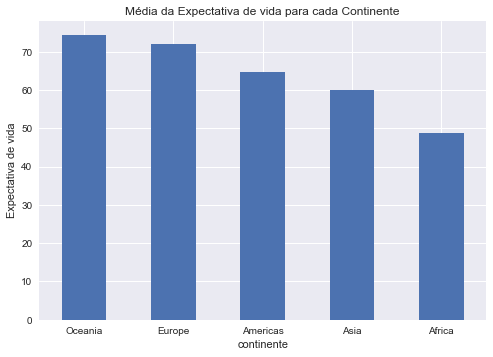

In [327]:
df.groupby("continente")["expectativa de vida"].mean().sort_values(ascending=False).plot.bar(title="Média da Expectativa de vida para cada Continente")
plt.ylabel("Expectativa de vida")
plt.xticks(rotation='horizontal');

### 6.4 A média do PIB, durante todos os anos presentes no DataFrame para cada continente.

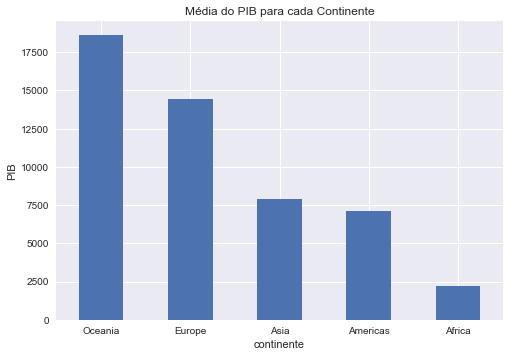

In [328]:
df.groupby("continente")["PIB"].mean().sort_values(ascending=False).plot.bar(title="Média do PIB para cada Continente")
plt.ylabel("PIB")
plt.xticks(rotation='horizontal');

## ----------------------------------------------- 7. Conclusão ------------------------------------------------------

### Em um contexto global, os países da Oceania e da Europa, se destacam na média de expectativa de vida e PIB. A partir da década de 70, os países da África, Ásia e Américas, se aproximaram na expectativa de vida dos dois países comentados anteriormente.
### Já a média do PIB Europeu e da Oceania, apresentou um distanciamento quando comparado com a média dos outros continente a partir do início da década de 70.
### Mesmo num contexto geral, onde é analisada a média da expectativa de vida e PIB para todos os anos informados no DataFrame, os continentes da Oceania e da Europa, continuam sendo os primeiros nas estastisticas de qualidade de vida.
### Isso diz muito sobre os cenários que foram analisados (expectativa de vida e PIB), visto que a maioria dos países europeus, estando nos topos das estatitiscas, foram países colonizadores de outros.